# LeNet-5:
---
http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf

This paper was puplished in 1998, and it uses filter layers with no padding followed by pooling layers. Therefore, the height and width will keep decreasing.

Following is the architecture:
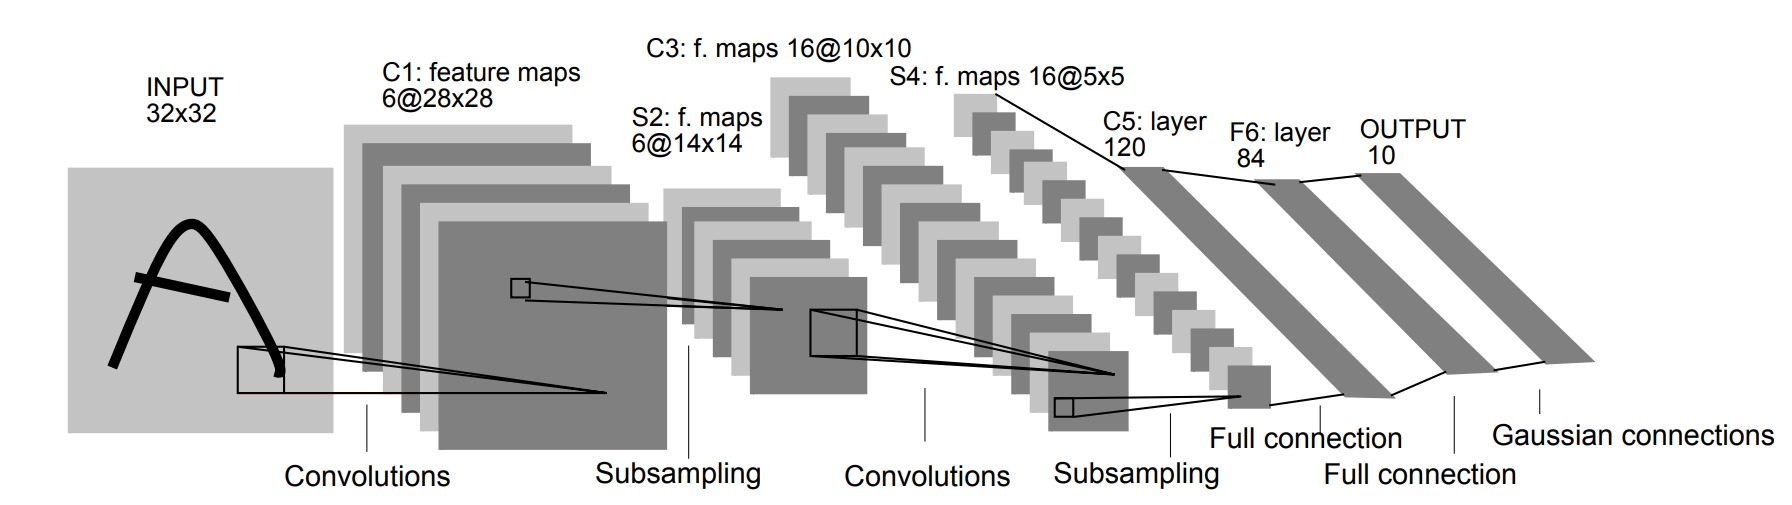
The dataset that will be used will start with a 28 by 28 image instead of 32 by 32, but the ideas remain the same:

# Code Implementation:

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the dataset:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)
y_train shape:  (60000,)
y_test shape:  (10000,)


In [4]:
# reshaping the data to be compatible with the architecture, and normalizing it:
x_train = x_train.astype('float')
x_test = x_test.astype('float')
x_train = x_train.reshape(60000,28,28,1)/255.0
x_test = x_test.reshape(10000,28,28,1)/255.0

In [5]:
# One hot encoding the labels:
# y_train = tf.keras.utils.to_categorical(y_train,10)
# y_test = tf.keras.utils.to_categorical(y_test,10)

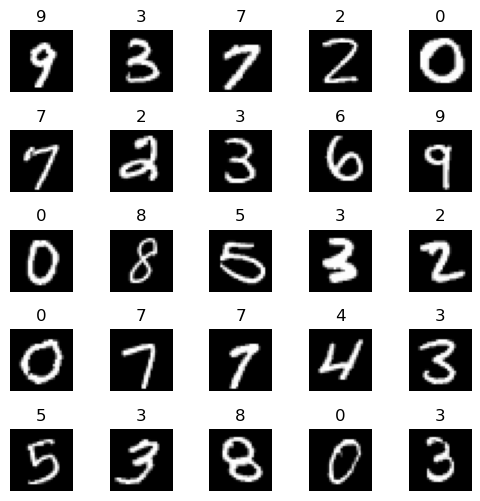

In [6]:
# Examining the data:
fig, ax = plt.subplots(5,5,figsize=(5,5))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(ax.flat):
    rand = np.random.randint(len(x_train))
    ax.imshow(x_train[rand].reshape(28,28), cmap='gray')
    ax.set_title(y_train[rand])
    ax.set_axis_off()

In [7]:
# Building the model:
model = tf.keras.Sequential([
                            tf.keras.layers.Conv2D(filters=6, 
                                                   kernel_size=5,
                                                   activation='tanh',
                                                   input_shape=(28,28,1)),
    
                            tf.keras.layers.AveragePooling2D(pool_size=(2,2),
                                                             strides=(2,2)),
    
                            tf.keras.layers.Conv2D(filters=16, 
                                                   kernel_size=5,
                                                   activation='tanh'),
    
                            tf.keras.layers.AveragePooling2D(pool_size=(2,2),
                                                             strides=(2,2)),
    
                            tf.keras.layers.Flatten(),
    
                            tf.keras.layers.Dense(units=120,
                                                  activation='tanh'),
    
                            tf.keras.layers.Dense(units=84,
                                                  activation='tanh'),
    
                            tf.keras.layers.Dense(units=10,
                                                  activation='softmax')
                                                             
                           ])

In [8]:
# Model summary for sanity checking:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [9]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics='accuracy')

In [10]:
model.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 15s 29ms/step - loss: 0.3456 - accuracy: 0.8994
Epoch 2/10
469/469 [==============================] - 13s 27ms/step - loss: 0.1238 - accuracy: 0.9624
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0814 - accuracy: 0.9751
Epoch 4/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0612 - accuracy: 0.9813
Epoch 5/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0494 - accuracy: 0.9848
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0399 - accuracy: 0.9878
Epoch 7/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0341 - accuracy: 0.9894
Epoch 8/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0285 - accuracy: 0.9912
Epoch 9/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0240 - accuracy: 0.9922
Epoch 10/10
469/469 [==============================] - 13s 28ms/step - loss: 0.021

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0418 - accuracy: 0.9854


[0.04182468354701996, 0.9854000210762024]